In [1]:
import pandas as pd
import numpy as np
import keras
from keras import layers
from keras.models import Sequential

In [15]:
df = pd.read_csv('./data/climat/jena_climate_2009_2016.csv')

In [5]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [17]:
df = df[5::6] # every hour

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70091 entries, 5 to 420545
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date Time        70091 non-null  object 
 1   p (mbar)         70091 non-null  float64
 2   T (degC)         70091 non-null  float64
 3   Tpot (K)         70091 non-null  float64
 4   Tdew (degC)      70091 non-null  float64
 5   rh (%)           70091 non-null  float64
 6   VPmax (mbar)     70091 non-null  float64
 7   VPact (mbar)     70091 non-null  float64
 8   VPdef (mbar)     70091 non-null  float64
 9   sh (g/kg)        70091 non-null  float64
 10  H2OC (mmol/mol)  70091 non-null  float64
 11  rho (g/m**3)     70091 non-null  float64
 12  wv (m/s)         70091 non-null  float64
 13  max. wv (m/s)    70091 non-null  float64
 14  wd (deg)         70091 non-null  float64
dtypes: float64(14), object(1)
memory usage: 8.0+ MB


In [21]:
df.index = pd.to_datetime(df['Date Time'])

In [23]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


<Axes: xlabel='Date Time'>

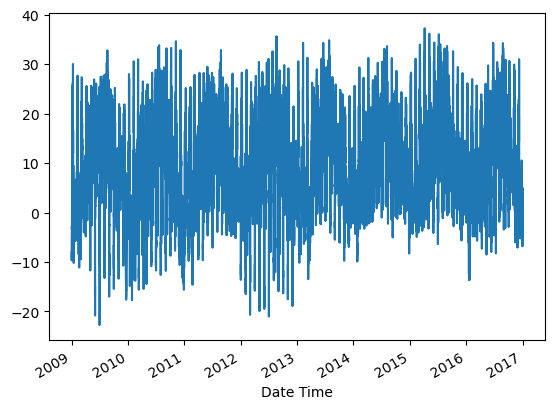

In [27]:
temp = df['T (degC)']
temp.plot()

In [39]:
def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
        
    return np.array(X), np.array(y)

In [41]:
WINDOW_SIZE = 5
X, y = df_to_X_y(temp, WINDOW_SIZE)

In [43]:
X.shape, y.shape

((70086, 5, 1), (70086,))

In [45]:
X_train, y_train = X[:60000], y[:60000]
X_val, y_val = X[60000:65000], y[60000:65000]
X_test, y_test = X[65000:], y[65000:]

In [47]:
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam

In [53]:
model1 = Sequential([
    
    layers.InputLayer((5,1)),
    layers.LSTM(64),
    layers.Dense(8, 'relu'),
    layers.Dense(1, 'linear')
])

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
cp = ModelCheckpoint('model1/',save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [57]:
model1.fit(X_train,y_train,validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
1872/1875 [============================>.] - ETA: 0s - loss: 57.8200 - root_mean_squared_error: 7.6039INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 32s 14ms/step - loss: 57.7402 - root_mean_squared_error: 7.5987 - val_loss: 1.9920 - val_root_mean_squared_error: 1.4114
Epoch 2/10
1875/1875 [==============================] - ETA: 0s - loss: 3.7984 - root_mean_squared_error: 1.9490INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 25s 14ms/step - loss: 3.7984 - root_mean_squared_error: 1.9490 - val_loss: 0.6769 - val_root_mean_squared_error: 0.8228
Epoch 3/10
1871/1875 [============================>.] - ETA: 0s - loss: 1.1761 - root_mean_squared_error: 1.0845INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 25s 13ms/step - loss: 1.1748 - root_mean_squared_error: 1.0839 - val_loss: 0.5527 - val_root_mean_squared_error: 0.7434
Epoch 4/10
1875/1875 [==============================] - ETA: 0s - loss: 0.7923 - root_mean_squared_error: 0.8901INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 25s 13ms/step - loss: 0.7923 - root_mean_squared_error: 0.8901 - val_loss: 0.5244 - val_root_mean_squared_error: 0.7241
Epoch 5/10
1875/1875 [==============================] - ETA: 0s - loss: 0.6999 - root_mean_squared_error: 0.8366INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 25s 13ms/step - loss: 0.6999 - root_mean_squared_error: 0.8366 - val_loss: 0.5221 - val_root_mean_squared_error: 0.7225
Epoch 6/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.6722 - root_mean_squared_error: 0.8199INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 26s 14ms/step - loss: 0.6719 - root_mean_squared_error: 0.8197 - val_loss: 0.5099 - val_root_mean_squared_error: 0.7141
Epoch 7/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.6592 - root_mean_squared_error: 0.8119INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 25s 14ms/step - loss: 0.6593 - root_mean_squared_error: 0.8120 - val_loss: 0.5023 - val_root_mean_squared_error: 0.7088
Epoch 8/10
1875/1875 [==============================] - ETA: 0s - loss: 0.6528 - root_mean_squared_error: 0.8080INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 20s 11ms/step - loss: 0.6528 - root_mean_squared_error: 0.8080 - val_loss: 0.4972 - val_root_mean_squared_error: 0.7051
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6489 - root_mean_squared_error: 0.8055 - val_loss: 0.5097 - val_root_mean_squared_error: 0.7139
Epoch 10/10
1860/1875 [============================>.] - ETA: 0s - loss: 0.6452 - root_mean_squared_error: 0.8032INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 9s 5ms/step - loss: 0.6452 - root_mean_squared_error: 0.8033 - val_loss: 0.4970 - val_root_mean_squared_error: 0.7050


In [59]:
from keras.models import load_model

In [61]:
model1 = load_model('./model1/')

In [65]:
train_predictions = model1.predict(X_train).flatten()

1875/1875 [==============================] - 3s 2ms/step


In [67]:
train_results =pd.DataFrame(data={'Train Predictions': train_predictions, 
                                  'Actuals':y_train})
train_results.head()

,Train Predictions,Actuals
0,-9.902222,-9.67
1,-9.613259,-9.17
2,-8.771782,-8.10
3,-7.358581,-7.66
4,-7.293528,-7.04


In [69]:
import matplotlib.pyplot as plt

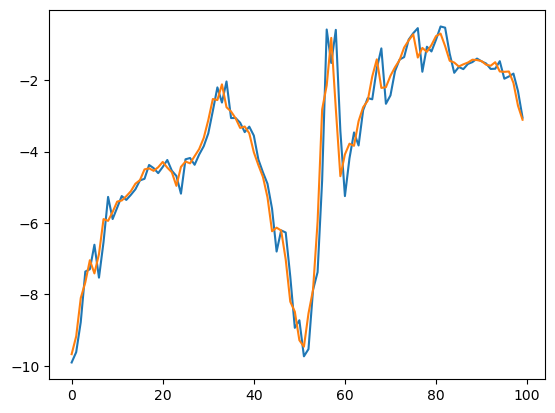

In [79]:
plt.plot(train_results[:100])

In [81]:
val_predictions = model1.predict(X_val).flatten()
val_results =pd.DataFrame(data={'Train Predictions': val_predictions, 
                                  'Actuals':y_val})
val_results.head()

157/157 [==============================] - 1s 2ms/step


,Train Predictions,Actuals
0,15.463530,14.02
1,13.333497,13.67
2,13.214580,12.27
3,11.605651,11.19
4,10.520823,10.85


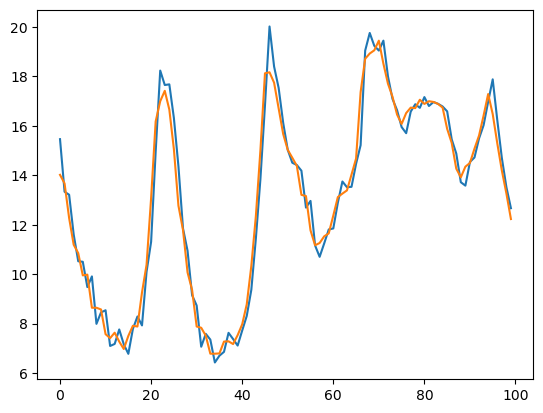

In [85]:
plt.plot(val_results[:100])

159/159 [==============================] - 0s 2ms/step


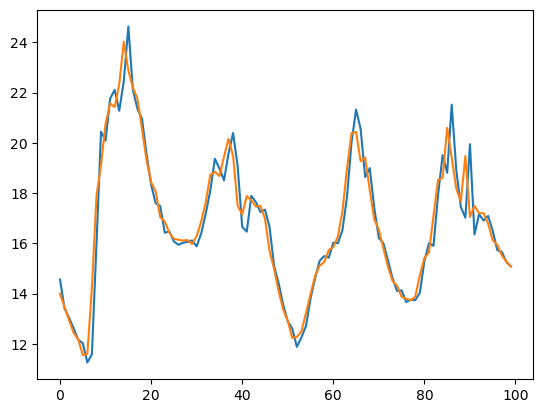

In [87]:
test_predictions = model1.predict(X_test).flatten()
test_results =pd.DataFrame(data={'Train Predictions': test_predictions, 
                                  'Actuals':y_test})
test_results.head()
plt.plot(test_results[:100])

In [93]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions(model, X, y, start=0, end=100):
    predictions = model.predict(X).flatten()
    df = pd.DataFrame(data={'Predictions':predictions,
                       'Actuals':y})
    plt.plot(df['Predictions'][start:end])
    plt.plot(df['Actuals'][start:end])
    plt.legend(['Predicted','Real'])
    
    return df, mse(y, predictions)

159/159 [==============================] - 0s 2ms/step


(      Predictions  Actuals
 0       14.559449    13.99
 1       13.406383    13.46
 2       13.032129    12.93
 3       12.608958    12.43
 4       12.158046    12.17
 ...           ...      ...
 5081    -0.879537    -0.98
 5082    -1.493370    -1.40
 5083    -1.778134    -2.75
 5084    -3.279972    -2.89
 5085    -3.162866    -3.93
 
 [5086 rows x 2 columns],
 0.6039609223335535)

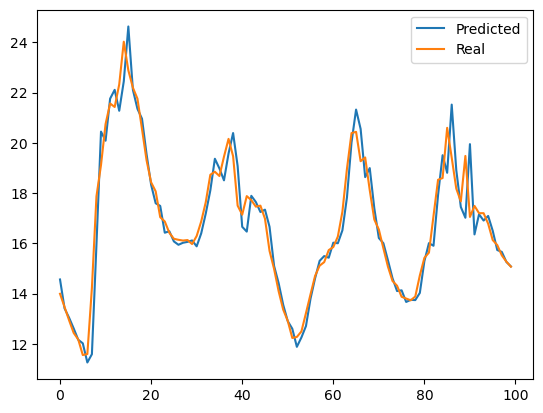

In [95]:
plot_predictions(model1, X_test, y_test)

In [99]:
model2 = Sequential([
    
    layers.InputLayer((5,1)),
    layers.Conv1D(64, kernel_size=2),
    layers.Flatten(),
    layers.Dense(8, 'relu'),
    layers.Dense(1, 'linear')
    
])

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 8)                 2056      
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2257 (8.82 KB)
Trainable params: 2257 (8.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [103]:
cp2 = ModelCheckpoint('model2/',save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [105]:
model2.fit(X_train,y_train,validation_data=(X_val, y_val), epochs=10, callbacks=[cp2])

Epoch 1/10
1849/1875 [============================>.] - ETA: 0s - loss: 6.7040 - root_mean_squared_error: 2.5892INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 4s 2ms/step - loss: 6.6304 - root_mean_squared_error: 2.5750 - val_loss: 1.0388 - val_root_mean_squared_error: 1.0192
Epoch 2/10
1853/1875 [============================>.] - ETA: 0s - loss: 1.0263 - root_mean_squared_error: 1.0131INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 2ms/step - loss: 1.0230 - root_mean_squared_error: 1.0114 - val_loss: 0.6444 - val_root_mean_squared_error: 0.8027
Epoch 3/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.7675 - root_mean_squared_error: 0.8761INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.7670 - root_mean_squared_error: 0.8758 - val_loss: 0.5346 - val_root_mean_squared_error: 0.7312
Epoch 4/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.6964 - root_mean_squared_error: 0.8345INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.6961 - root_mean_squared_error: 0.8343 - val_loss: 0.5078 - val_root_mean_squared_error: 0.7126
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6734 - root_mean_squared_error: 0.8206 - val_loss: 0.5328 - val_root_mean_squared_error: 0.7299
Epoch 6/10
1854/1875 [============================>.] - ETA: 0s - loss: 0.6650 - root_mean_squared_error: 0.8154INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.6663 - root_mean_squared_error: 0.8163 - val_loss: 0.4964 - val_root_mean_squared_error: 0.7045
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6633 - root_mean_squared_error: 0.8144 - val_loss: 0.5003 - val_root_mean_squared_error: 0.7074
Epoch 8/10
1847/1875 [============================>.] - ETA: 0s - loss: 0.6600 - root_mean_squared_error: 0.8124INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.6597 - root_mean_squared_error: 0.8122 - val_loss: 0.4903 - val_root_mean_squared_error: 0.7002
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6600 - root_mean_squared_error: 0.8124 - val_loss: 0.5232 - val_root_mean_squared_error: 0.7233
Epoch 10/10
1862/1875 [============================>.] - ETA: 0s - loss: 0.6573 - root_mean_squared_error: 0.8108INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.6570 - root_mean_squared_error: 0.8106 - val_loss: 0.4891 - val_root_mean_squared_error: 0.6994


In [113]:
model3 = Sequential([
    
    layers.InputLayer((5,1)),
    layers.GRU(64),
    layers.Dense(8, 'relu'),
    layers.Dense(1, 'linear')
    
])

model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 64)                12864     
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 13393 (52.32 KB)
Trainable params: 13393 (52.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [115]:
cp3 = ModelCheckpoint('model3/',save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [117]:
model3.fit(X_train,y_train,validation_data=(X_val, y_val), epochs=10, callbacks=[cp3])

Epoch 1/10
1863/1875 [============================>.] - ETA: 0s - loss: 28.8051 - root_mean_squared_error: 5.3670INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 8s 4ms/step - loss: 28.6441 - root_mean_squared_error: 5.3520 - val_loss: 0.9637 - val_root_mean_squared_error: 0.9817
Epoch 2/10
1860/1875 [============================>.] - ETA: 0s - loss: 1.6709 - root_mean_squared_error: 1.2926INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 1.6646 - root_mean_squared_error: 1.2902 - val_loss: 0.6226 - val_root_mean_squared_error: 0.7890
Epoch 3/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.8637 - root_mean_squared_error: 0.9294INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.8630 - root_mean_squared_error: 0.9290 - val_loss: 0.5257 - val_root_mean_squared_error: 0.7250
Epoch 4/10
1875/1875 [==============================] - ETA: 0s - loss: 0.7069 - root_mean_squared_error: 0.8408INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.7069 - root_mean_squared_error: 0.8408 - val_loss: 0.5213 - val_root_mean_squared_error: 0.7220
Epoch 5/10
1863/1875 [============================>.] - ETA: 0s - loss: 0.6664 - root_mean_squared_error: 0.8163INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.6668 - root_mean_squared_error: 0.8166 - val_loss: 0.5007 - val_root_mean_squared_error: 0.7076
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6538 - root_mean_squared_error: 0.8086 - val_loss: 0.5057 - val_root_mean_squared_error: 0.7111
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6474 - root_mean_squared_error: 0.8046 - val_loss: 0.5158 - val_root_mean_squared_error: 0.7182
Epoch 8/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.6439 - root_mean_squared_error: 0.8024INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 8s 4ms/step - loss: 0.6441 - root_mean_squared_error: 0.8026 - val_loss: 0.4959 - val_root_mean_squared_error: 0.7042
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6421 - root_mean_squared_error: 0.8013 - val_loss: 0.4993 - val_root_mean_squared_error: 0.7066
Epoch 10/10
1862/1875 [============================>.] - ETA: 0s - loss: 0.6396 - root_mean_squared_error: 0.7997INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 10s 5ms/step - loss: 0.6399 - root_mean_squared_error: 0.8000 - val_loss: 0.4937 - val_root_mean_squared_error: 0.7026


In [129]:
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['seconds'] = temp_df.index.map(pd.Timestamp.timestamp) - 1.2307716e+09
temp_df.head()

,Temperature,seconds
Date Time,,
2009-01-01 01:00:00,-8.05,0.0
2009-01-01 02:00:00,-8.88,3600.0
2009-01-01 03:00:00,-8.81,7200.0
2009-01-01 04:00:00,-9.05,10800.0
2009-01-01 05:00:00,-9.63,14400.0


In [169]:
day = 60*60*24
year = 365.2425*day

In [171]:
temp_df['Day sin'] = np.sin(temp_df['seconds']*(2*np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['seconds']*(2*np.pi / day))

In [173]:
temp_df['Year sin'] = np.sin(temp_df['seconds']*(2*np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['seconds']*(2*np.pi / year))

In [177]:
temp_df.drop('seconds',axis=1,inplace=True)

In [179]:
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.000000,1.000000,0.000000,1.000000
2009-01-01 02:00:00,-8.88,0.258819,0.965926,0.000717,1.000000
2009-01-01 03:00:00,-8.81,0.500000,0.866025,0.001434,0.999999
2009-01-01 04:00:00,-9.05,0.707107,0.707107,0.002150,0.999998
2009-01-01 05:00:00,-9.63,0.866025,0.500000,0.002867,0.999996


In [181]:
def df_to_X_y_2(df, window_size=6):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
        
    return np.array(X), np.array(y)

In [183]:
X2, y2 = df_to_X_y_2(temp_df)

In [185]:
X2.shape, y2.shape

((70085, 6, 5), (70085,))

In [187]:
X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:65000], y2[60000:65000]
X2_test, y2_test = X2[65000:], y2[65000:]

In [191]:
temp_training_mean = np.mean(X2_train[:,:,0])
temp_training_std = np.std(X2_train[:,:,0])

def preprocess(X):
    X[:,:,0] = X[:,:,0] - temp_training_mean / temp_training_std
    
    return X

In [193]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 1.71627514e+01, -1.00000000e+00,  8.13189989e-13,
          5.31417433e-01, -8.47110094e-01],
        [ 1.67427514e+01, -9.65925826e-01,  2.58819045e-01,
          5.30810103e-01, -8.47490787e-01],
        [ 1.55427514e+01, -8.66025404e-01,  5.00000000e-01,
          5.30202500e-01, -8.47871045e-01],
        [ 1.47427514e+01, -7.07106781e-01,  7.07106781e-01,
          5.29594625e-01, -8.48250867e-01],
        [ 1.39827514e+01, -5.00000000e-01,  8.66025404e-01,
          5.28986478e-01, -8.48630253e-01],
        [ 1.28827514e+01, -2.58819045e-01,  9.65925826e-01,
          5.28378059e-01, -8.49009203e-01]],

       [[ 1.67427514e+01, -9.65925826e-01,  2.58819045e-01,
          5.30810103e-01, -8.47490787e-01],
        [ 1.55427514e+01, -8.66025404e-01,  5.00000000e-01,
          5.30202500e-01, -8.47871045e-01],
        [ 1.47427514e+01, -7.07106781e-01,  7.07106781e-01,
          5.29594625e-01, -8.48250867e-01],
        [ 1.39827514e+01, -5.00000000e-01,  8.66025404e-01,
  

In [199]:
model4 = Sequential([
    
    layers.InputLayer((6,5)),
    layers.LSTM(64),
    layers.Dense(8, 'relu'),
    layers.Dense(1, 'linear')
])

model4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 64)                17920     
                                                                 
 dense_16 (Dense)            (None, 8)                 520       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 18449 (72.07 KB)
Trainable params: 18449 (72.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [201]:
cp4 = ModelCheckpoint('model3/',save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model4.fit(X2_train,y2_train,validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
1871/1875 [============================>.] - ETA: 0s - loss: 38.5049 - root_mean_squared_error: 6.2052INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 42s 19ms/step - loss: 38.4342 - root_mean_squared_error: 6.1995 - val_loss: 1.3698 - val_root_mean_squared_error: 1.1704
Epoch 2/10
1871/1875 [============================>.] - ETA: 0s - loss: 2.2661 - root_mean_squared_error: 1.5053INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 28s 15ms/step - loss: 2.2629 - root_mean_squared_error: 1.5043 - val_loss: 0.5785 - val_root_mean_squared_error: 0.7606
Epoch 3/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.8398 - root_mean_squared_error: 0.9164INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 28s 15ms/step - loss: 0.8397 - root_mean_squared_error: 0.9163 - val_loss: 0.4738 - val_root_mean_squared_error: 0.6883
Epoch 4/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.6258 - root_mean_squared_error: 0.7911INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 28s 15ms/step - loss: 0.6253 - root_mean_squared_error: 0.7907 - val_loss: 0.4515 - val_root_mean_squared_error: 0.6720
Epoch 5/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.5729 - root_mean_squared_error: 0.7569INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 28s 15ms/step - loss: 0.5728 - root_mean_squared_error: 0.7569 - val_loss: 0.4429 - val_root_mean_squared_error: 0.6655
Epoch 6/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.5539 - root_mean_squared_error: 0.7443INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 27s 14ms/step - loss: 0.5543 - root_mean_squared_error: 0.7445 - val_loss: 0.4317 - val_root_mean_squared_error: 0.6571
Epoch 7/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.5442 - root_mean_squared_error: 0.7377INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 29s 16ms/step - loss: 0.5452 - root_mean_squared_error: 0.7384 - val_loss: 0.4292 - val_root_mean_squared_error: 0.6551
Epoch 8/10
1875/1875 [==============================] - ETA: 0s - loss: 0.5401 - root_mean_squared_error: 0.7349INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 19s 10ms/step - loss: 0.5401 - root_mean_squared_error: 0.7349 - val_loss: 0.4288 - val_root_mean_squared_error: 0.6548
Epoch 9/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.5356 - root_mean_squared_error: 0.7319 - val_loss: 0.4314 - val_root_mean_squared_error: 0.6568
Epoch 10/10
1875/1875 [==============================] - ETA: 0s - loss: 0.5326 - root_mean_squared_error: 0.7298INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 29s 15ms/step - loss: 0.5326 - root_mean_squared_error: 0.7298 - val_loss: 0.4245 - val_root_mean_squared_error: 0.6515


159/159 [==============================] - 2s 6ms/step


(      Predictions  Actuals
 0       13.060364    13.46
 1       12.751192    12.93
 2       12.357167    12.43
 3       12.053948    12.17
 4       12.123636    11.55
 ...           ...      ...
 5080    -1.355431    -0.98
 5081    -1.528269    -1.40
 5082    -1.686185    -2.75
 5083    -3.116871    -2.89
 5084    -3.280842    -3.93
 
 [5085 rows x 2 columns],
 0.4956259927846311)

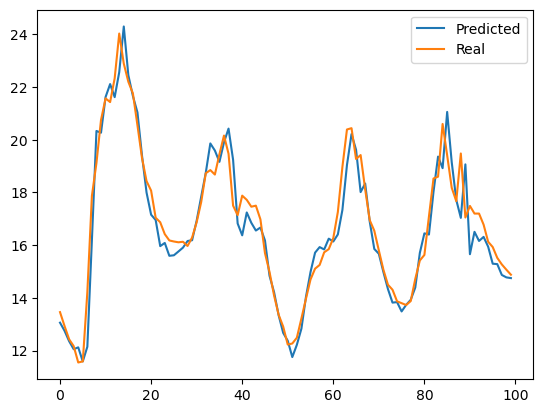

In [203]:
plot_predictions(model4,X2_test,y2_test)

In [205]:
p_temp_df = pd.concat([df['p (mbar)'], temp_df], axis=1)

In [207]:
p_temp_df.head()

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,0.000000,1.000000,0.000000,1.000000
2009-01-01 02:00:00,996.62,-8.88,0.258819,0.965926,0.000717,1.000000
2009-01-01 03:00:00,996.84,-8.81,0.500000,0.866025,0.001434,0.999999
2009-01-01 04:00:00,996.99,-9.05,0.707107,0.707107,0.002150,0.999998
2009-01-01 05:00:00,997.46,-9.63,0.866025,0.500000,0.002867,0.999996


In [209]:
def df_to_X_y_3(df, window_size=7):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
        y.append(label)
        
    return np.array(X), np.array(y)

In [211]:
X3, y3 = df_to_X_y_3(p_temp_df)
X3.shape, y3.shape

((70084, 7, 6), (70084, 2))

In [213]:
X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:65000], y3[60000:65000]
X3_test, y3_test = X3[65000:], y3[65000:]

In [217]:
p_training_mean = np.mean(X3_train[:,:,0])
p_training_std = np.std(X3_train[:,:,0])

temp_training_mean = np.mean(X3_train[:,:,1])
temp_training_std = np.std(X3_train[:,:,1])

In [221]:
def preprocess_3(X):
    X[:,:,1] = (X[:,:,1] - temp_training_mean) / temp_training_std
    X[:,:,0] = (X[:,:,0] - p_training_mean) / p_training_std
    
    return X

def preprocess_output(y):
    y[:,0] = (y[:,0] - p_training_mean) / p_training_std
    y[:,1] = (y[:,1] - temp_training_mean) / temp_training_std
    
    return y

In [223]:
preprocess_3(X3_train)
preprocess_3(X3_val)
preprocess_3(X3_test)

array([[[-1.07355644e+00,  1.04009390e+00, -1.00000000e+00,
          8.13189989e-13,  5.31417433e-01, -8.47110094e-01],
        [-1.00807435e+00,  9.90728707e-01, -9.65925826e-01,
          2.58819045e-01,  5.30810103e-01, -8.47490787e-01],
        [-9.51080673e-01,  8.49685305e-01, -8.66025404e-01,
          5.00000000e-01,  5.30202500e-01, -8.47871045e-01],
        ...,
        [-8.80748054e-01,  6.66328883e-01, -5.00000000e-01,
          8.66025404e-01,  5.28986478e-01, -8.48630253e-01],
        [-8.29817537e-01,  5.37039098e-01, -2.58819045e-01,
          9.65925826e-01,  5.28378059e-01, -8.49009203e-01],
        [-8.01927015e-01,  4.74744929e-01, -1.75015416e-12,
          1.00000000e+00,  5.27769368e-01, -8.49387717e-01]],

       [[-1.00807435e+00,  9.90728707e-01, -9.65925826e-01,
          2.58819045e-01,  5.30810103e-01, -8.47490787e-01],
        [-9.51080673e-01,  8.49685305e-01, -8.66025404e-01,
          5.00000000e-01,  5.30202500e-01, -8.47871045e-01],
        [-9.14701

In [225]:
preprocess_output(y3_train)
preprocess_output(y3_val)
preprocess_output(y3_test)

array([[-0.7934386 ,  0.41245076],
       [-0.76312281,  0.35368268],
       [-0.72189335,  0.32312327],
       ...,
       [ 1.48145784, -1.43051636],
       [ 1.41597574, -1.44697142],
       [ 1.35049365, -1.56920903]])

In [227]:
model5 = Sequential([
    
    layers.InputLayer((7,6)),
    layers.LSTM(64),
    layers.Dense(8, 'relu'),
    layers.Dense(2, 'linear')
])

model5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 64)                18176     
                                                                 
 dense_18 (Dense)            (None, 8)                 520       
                                                                 
 dense_19 (Dense)            (None, 2)                 18        
                                                                 
Total params: 18714 (73.10 KB)
Trainable params: 18714 (73.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [231]:
cp5 = ModelCheckpoint('model5/',save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model5.fit(X3_train,y3_train,validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 0.1408 - root_mean_squared_error: 0.3752INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 45s 21ms/step - loss: 0.1408 - root_mean_squared_error: 0.3752 - val_loss: 0.0329 - val_root_mean_squared_error: 0.1814
Epoch 2/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0246 - root_mean_squared_error: 0.1567INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 29s 15ms/step - loss: 0.0245 - root_mean_squared_error: 0.1567 - val_loss: 0.0183 - val_root_mean_squared_error: 0.1354
Epoch 3/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0127 - root_mean_squared_error: 0.1125INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 29s 15ms/step - loss: 0.0127 - root_mean_squared_error: 0.1125 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0904
Epoch 4/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0077 - root_mean_squared_error: 0.0879INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 29s 15ms/step - loss: 0.0077 - root_mean_squared_error: 0.0879 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0759
Epoch 5/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.0796INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 30s 16ms/step - loss: 0.0063 - root_mean_squared_error: 0.0796 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0702
Epoch 6/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.0753INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 30s 16ms/step - loss: 0.0057 - root_mean_squared_error: 0.0753 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0654
Epoch 7/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.0734INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 30s 16ms/step - loss: 0.0054 - root_mean_squared_error: 0.0733 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0644
Epoch 8/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.0723INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 31s 17ms/step - loss: 0.0052 - root_mean_squared_error: 0.0723 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0628
Epoch 9/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0052 - root_mean_squared_error: 0.0718 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0640
Epoch 10/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.0714INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 29s 15ms/step - loss: 0.0051 - root_mean_squared_error: 0.0714 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0623


In [233]:
def plot_predictions2(model, X, y, start=0, end=100):
    predictions = model.predict(X)
    p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
    p_actuals, temp_actuals = y[:, 0], y[:, 1]
    df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
    plt.plot(df['Temperature Predictions'][start:end])
    plt.plot(df['Temperature Actuals'][start:end])
    plt.plot(df['Pressure Predictions'][start:end])
    plt.plot(df['Pressure Actuals'][start:end])
    return df

159/159 [==============================] - 1s 6ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.399378,0.412451,-0.783948,-0.793439
1,0.356223,0.353683,-0.772243,-0.763123
2,0.313574,0.323123,-0.736452,-0.721893
3,0.309779,0.250251,-0.680474,-0.652773
4,0.250271,0.254952,-0.589010,-0.652773
...,...,...,...,...
5079,-1.286444,-1.222477,1.602325,1.601508
5080,-1.297903,-1.271843,1.574249,1.506923
5081,-1.298501,-1.430516,1.473781,1.481458
5082,-1.475628,-1.446971,1.421797,1.415976


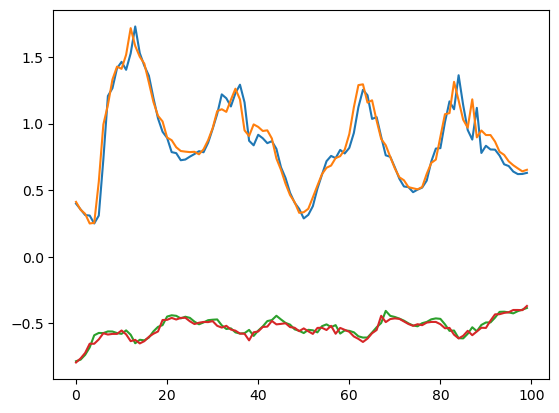

In [237]:
plot_predictions2(model5, X3_test, y3_test)

In [239]:
def postprocess_temp(arr):
    arr = (arr*temp_training_std) + temp_training_mean
    return arr

def postprocess_p(arr):
    arr = (arr*p_training_std) + p_training_mean
    return arr

In [241]:
def get_predictions_postprocessed(model, X, y):
    predictions = model.predict(X)
    p_preds, temp_preds = postprocess_p(predictions[:, 0]), postprocess_temp(predictions[:, 1])
    p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
    df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
    return df

In [243]:
post_processed_df = get_predictions_postprocessed(model5, X3_test, y3_test)
post_processed_df

159/159 [==============================] - 1s 7ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,12.818779,12.93,982.508301,982.43
1,12.451610,12.43,982.604797,982.68
2,12.088752,12.17,982.899963,983.02
3,12.056469,11.55,983.361572,983.59
4,11.550176,11.59,984.115845,983.59
...,...,...,...,...
5079,-1.524228,-0.98,1002.186768,1002.18
5080,-1.621725,-1.40,1001.955261,1001.40
5081,-1.626808,-2.75,1001.126709,1001.19
5082,-3.133811,-2.89,1000.698059,1000.65


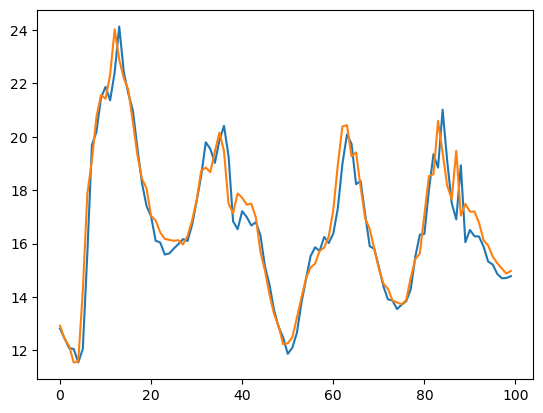

In [245]:
start, end = 0, 100
plt.plot(post_processed_df['Temperature Predictions'][start:end])
plt.plot(post_processed_df['Temperature Actuals'][start:end])

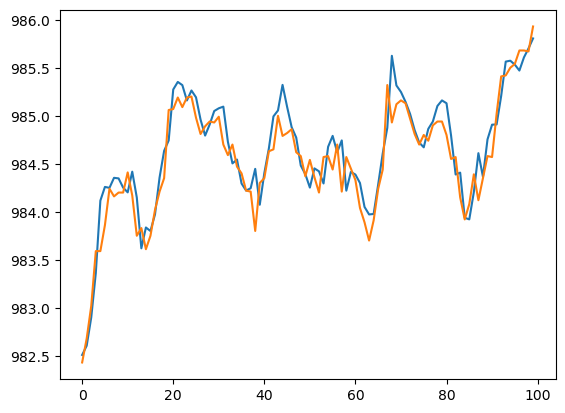

In [247]:
plt.plot(post_processed_df['Pressure Predictions'][start:end])
plt.plot(post_processed_df['Pressure Actuals'][start:end])

In [249]:
model6 = Sequential([
    
    layers.InputLayer((7,6)),
    layers.LSTM(32, return_sequences=True),
    layers.LSTM(64),
    layers.Dense(8, 'relu'),
    layers.Dense(2, 'linear')
])

model6.summary()

cp6 = ModelCheckpoint('model6/',save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model6.fit(X3_train,y3_train,validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp6])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 7, 32)             4992      
                                                                 
 lstm_8 (LSTM)               (None, 64)                24832     
                                                                 
 dense_20 (Dense)            (None, 8)                 520       
                                                                 
 dense_21 (Dense)            (None, 2)                 18        
                                                                 
Total params: 30362 (118.60 KB)
Trainable params: 30362 (118.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 0.3381 - root_mean_squared_error: 0.5815INFO:tensorflow:Assets written to: 

INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 60s 27ms/step - loss: 0.3381 - root_mean_squared_error: 0.5815 - val_loss: 0.2032 - val_root_mean_squared_error: 0.4508
Epoch 2/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0816 - root_mean_squared_error: 0.2856INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 56s 30ms/step - loss: 0.0815 - root_mean_squared_error: 0.2855 - val_loss: 0.0254 - val_root_mean_squared_error: 0.1594
Epoch 3/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0184 - root_mean_squared_error: 0.1357INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 48s 26ms/step - loss: 0.0184 - root_mean_squared_error: 0.1357 - val_loss: 0.0129 - val_root_mean_squared_error: 0.1135
Epoch 4/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0120 - root_mean_squared_error: 0.1097INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 48s 26ms/step - loss: 0.0120 - root_mean_squared_error: 0.1097 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0968
Epoch 5/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0096 - root_mean_squared_error: 0.0979INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 47s 25ms/step - loss: 0.0096 - root_mean_squared_error: 0.0979 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0867
Epoch 6/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0078 - root_mean_squared_error: 0.0884INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 49s 26ms/step - loss: 0.0078 - root_mean_squared_error: 0.0884 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0824
Epoch 7/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0066 - root_mean_squared_error: 0.0810INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 51s 27ms/step - loss: 0.0066 - root_mean_squared_error: 0.0810 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0719
Epoch 8/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.0770INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 51s 27ms/step - loss: 0.0059 - root_mean_squared_error: 0.0770 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0679
Epoch 9/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0056 - root_mean_squared_error: 0.0749 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0783
Epoch 10/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.0739INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 48s 25ms/step - loss: 0.0055 - root_mean_squared_error: 0.0739 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0664


In [257]:
def get_predictions_postprocessed(model, X, y):
    predictions = model.predict(X)
    p_preds, temp_preds = postprocess_p(predictions[:, 0]), postprocess_temp(predictions[:, 1])
    p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
    df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
    plt.plot(df['Temperature Predictions'][start:end])
    plt.plot(df['Temperature Actuals'][start:end])
    
    return df

159/159 [==============================] - 2s 10ms/step


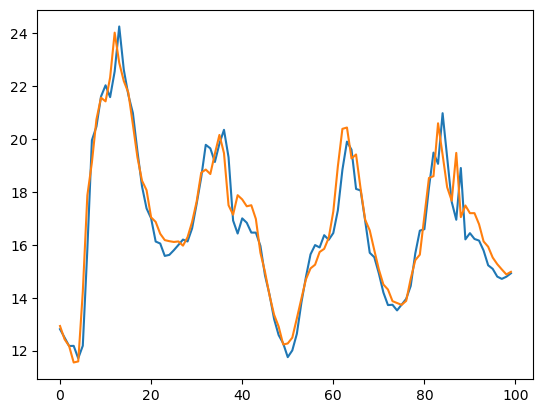

In [259]:
df_to_plot = get_predictions_postprocessed(model6, X3_test, y3_test)

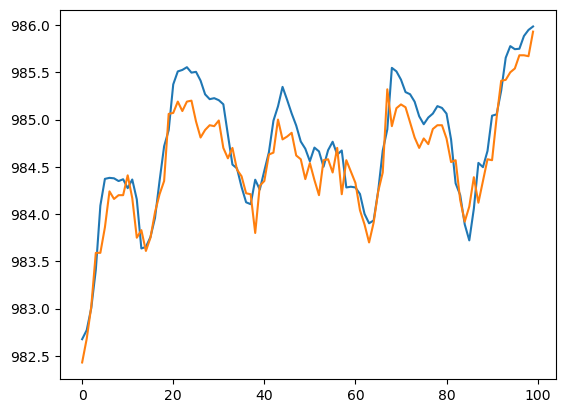

In [261]:
plt.plot(df_to_plot['Pressure Predictions'][start:end])
plt.plot(df_to_plot['Pressure Actuals'][start:end])

In [265]:
model7 = Sequential([
    
    layers.InputLayer((7,6)),
    layers.Conv1D(64, kernel_size=2, activation='relu'),
    layers.Flatten(),
    layers.Dense(8, 'relu'),
    layers.Dense(2, 'linear')
])

model7.summary()

cp7 = ModelCheckpoint('model7/',save_best_only=True)
model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model7.fit(X3_train,y3_train,validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp7])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 6, 64)             832       
                                                                 
 flatten_1 (Flatten)         (None, 384)               0         
                                                                 
 dense_22 (Dense)            (None, 8)                 3080      
                                                                 
 dense_23 (Dense)            (None, 2)                 18        
                                                                 
Total params: 3930 (15.35 KB)
Trainable params: 3930 (15.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.1396 - root_mean_squared_error: 0.3737INFO:tensorflow:Assets written to: mode

INFO:tensorflow:Assets written to: model7\assets


1875/1875 [==============================] - 21s 10ms/step - loss: 0.1394 - root_mean_squared_error: 0.3734 - val_loss: 0.0214 - val_root_mean_squared_error: 0.1464
Epoch 2/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0156 - root_mean_squared_error: 0.1248INFO:tensorflow:Assets written to: model7\assets


INFO:tensorflow:Assets written to: model7\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.0156 - root_mean_squared_error: 0.1248 - val_loss: 0.0109 - val_root_mean_squared_error: 0.1044
Epoch 3/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0103 - root_mean_squared_error: 0.1017INFO:tensorflow:Assets written to: model7\assets


INFO:tensorflow:Assets written to: model7\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.0103 - root_mean_squared_error: 0.1017 - val_loss: 0.0086 - val_root_mean_squared_error: 0.0927
Epoch 4/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.0085 - root_mean_squared_error: 0.0921INFO:tensorflow:Assets written to: model7\assets


INFO:tensorflow:Assets written to: model7\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.0085 - root_mean_squared_error: 0.0920 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0828
Epoch 5/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0074 - root_mean_squared_error: 0.0862INFO:tensorflow:Assets written to: model7\assets


INFO:tensorflow:Assets written to: model7\assets


1875/1875 [==============================] - 10s 5ms/step - loss: 0.0074 - root_mean_squared_error: 0.0862 - val_loss: 0.0062 - val_root_mean_squared_error: 0.0787
Epoch 6/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.0825INFO:tensorflow:Assets written to: model7\assets


INFO:tensorflow:Assets written to: model7\assets


1875/1875 [==============================] - 10s 5ms/step - loss: 0.0068 - root_mean_squared_error: 0.0825 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0755
Epoch 7/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.0800INFO:tensorflow:Assets written to: model7\assets


INFO:tensorflow:Assets written to: model7\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.0064 - root_mean_squared_error: 0.0800 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0723
Epoch 8/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.0783INFO:tensorflow:Assets written to: model7\assets


INFO:tensorflow:Assets written to: model7\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.0061 - root_mean_squared_error: 0.0783 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0705
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0059 - root_mean_squared_error: 0.0770 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0708
Epoch 10/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.0758INFO:tensorflow:Assets written to: model7\assets


INFO:tensorflow:Assets written to: model7\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.0057 - root_mean_squared_error: 0.0758 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0686


159/159 [==============================] - 2s 4ms/step


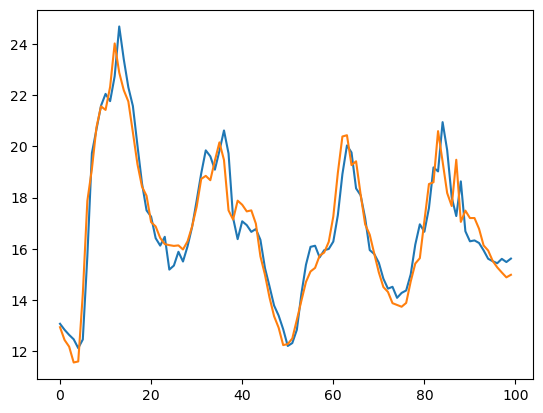

In [267]:
df_to_plot = get_predictions_postprocessed(model7, X3_test, y3_test)

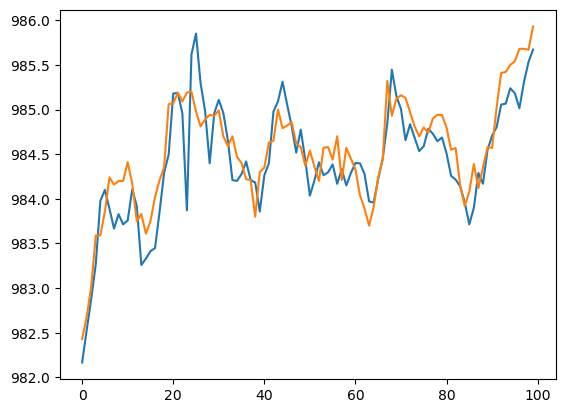

In [269]:
plt.plot(df_to_plot['Pressure Predictions'][start:end])
plt.plot(df_to_plot['Pressure Actuals'][start:end])